In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
from numpy.random import multinomial

def bootstrap(series, n=1000, *args, **kwargs):
    return multinomial(series.sum(), series/series.sum(), n)

In [43]:
import numpy as np

from lint.models import Bucket

def plot_bootstrap(token, w=8, h=8):
    
    series = Bucket.token_series(token)
    
    expected = series.sum() / len(series)

    bs = bootstrap(np.full(len(series), expected))
    
    plt.figure(figsize=(w, h))

    plt.plot(bs.mean(0))

    plt.fill_between(
        range(100),
        bs.mean(0) + 2*bs.std(0),
        bs.mean(0) - 2*bs.std(0),
        color='black',
        alpha=0.1,
    )
    
    plt.plot(series)
    
    print(token)
    plt.show()

yellow


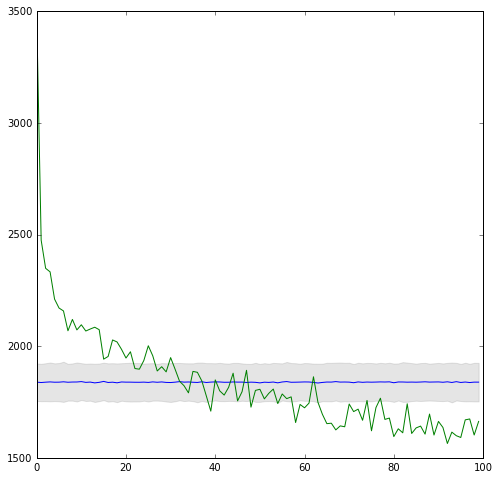

In [72]:
plot_bootstrap('yellow')

In [44]:
def zscores_series(token):
    
    series = Bucket.token_series(token)
    
    expected = series.sum() / len(series)

    bs = bootstrap(np.full(len(series), expected))
    
    return np.array([
        (observed-expected)/std
        for observed, std in zip(series, bs.std(0))
    ])

In [45]:
from joblib import Memory

from lint.models import Bucket

mem = Memory('cache')

token_counts = mem.cache(Bucket.token_counts)

tokens = token_counts(10000)

In [46]:
zscores = np.zeros((len(tokens), 100))

for i, token in enumerate(list(tokens.keys())[:500]):
    
    zscores[i] = zscores_series(token)
    
    if i%100 == 0:
        print(i)

0
100
200
300
400


In [35]:
for i in range(0, 100):
    print(i, list(tokens.keys())[zscores[:,i].argmax()])

0 chapter
1 of
2 of
3 a
4 a
5 a
6 a
7 a
8 a
9 a
10 a
11 a
12 a
13 a
14 a
15 a
16 a
17 a
18 a
19 a
20 a
21 a
22 a
23 a
24 a
25 a
26 a
27 a
28 miss
29 a
30 a
31 a
32 ’
33 miss
34 miss
35 miss
36 ’
37 “
38 “
39 “
40 “
41 “
42 “
43 “
44 “
45 “
46 “
47 ’
48 you
49 “
50 “
51 “
52 “
53 “
54 “
55 “
56 “
57 “
58 you
59 you
60 you
61 you
62 you
63 you
64 you
65 you
66 i
67 you
68 “
69 you
70 you
71 you
72 you
73 you
74 you
75 you
76 you
77 you
78 he
79 i
80 him
81 you
82 you
83 him
84 him
85 him
86 him
87 him
88 him
89 !
90 .
91 .
92 .
93 .
94 death
95 .
96 death
97 death
98 death
99 end


In [47]:
zscores[:,0].argsort()

array([  8,  15,   7, ...,   1,   5, 469])

In [74]:
for i in zscores[:,80].argsort()[::-1][:100]:
    print(list(tokens.keys())[i])

him
you
i
he
“
me
.
?
to
it
god
what
!
not
letter
can
will
now
?”
we
tell
.”
told
—
dead
would
know
love
no
think
heart
do
did
that
night
have
has
let
go
death
yes
leave
said
!”
done
cannot
she
be
cried
they
hope
away
if
come
lost
believe
ve
hands
then
against
last
help
again
could
get
had
thought
see
been
went
don
your
gone
is
try
there
once
must
before
hand
alone
where
speak
tried
us
happy
came
how
left
nothing
understand
moment
knew
case
t
"
fear
maybe
why
door
